<a href="https://colab.research.google.com/github/y001003/yeardream/blob/main/project/python_advance/titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 생존자 추정문제

## 1. 문제정의

세계에서 가장 유명한 비극적인 사고 중 하나인 타이나닉 호 침몰 사건, 그 사건의 데이터를 분석하여 생존율에 영향을 끼친 요인이 무엇이 있었는지, 어떤 데이터가 가장 유의적인 영향을 끼쳤는지 분석해 본다.

## 2. 데이터 수집


### 2-1. 데이터 불러오기

> 타이타닉 데이터는 캐글의 데이터를 가지고 온다.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = '/content/drive/MyDrive/이어드림/advance/프로젝트오리엔테이션/titanic.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)
df.head(5)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 2-2. 데이터 설명










```
pclass : 객실 등급 (1 = 1st, 2 = 2nd, 3 = 3rd)
survived : 생존 유무 (0 = No, 1 =Yes)
name : 칭호를 포함한 이름
sex : 성별 (female, male)
age : 나이 
sibsp : 형제 혹은 부부의 수
parch : 부모, 혹은 자녀의 수
ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
fare : 지불한 운임
cabin : 객실정보 
embarked : 선착장정보 (C = Cherbourg, Q = Queenstown, S = Southampton)
boat : 탈출한 보트가 있다면 boat 번호
body : 사망자의 시신 수습 후 부여한 일련번호
home : 출신
```
목표변수 : survived(범주형 데이터)  
독립변수  
- 범주형 데이터 : pclass, name, sex, ticket, cabin, embarked

## 3. 원본데이터 탐색


### 3-1 전체 데이터 파악

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


### 3-2. 상관계수 확인

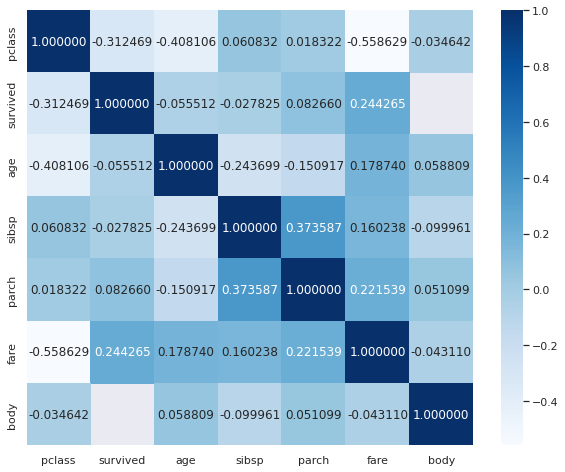

In [15]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.set(rc={'figure.figsize':(12, 5)})
sns.heatmap(df.corr(), annot=True, fmt='f', cmap="Blues")


원본 데이터의 상관계수 분석으로 보았을 때,  
<code>생존률(survived)</code>와 유의미하게 연관된 변수는 <code>pclass(-0.312469)</code>와 <code>fare(0.244265)</code>이다. \n  
이외에 눈에띄는 점은 <code>나이(age)</code> 변수의 생존률과의 상관계수가 -0.05 수준으로 생각보다 낮게 나왔다는 점이다. 나이가 높을수록 높은 *pclass*와 *fare* 변수를 갖음에도 생존률과 나이의 관계는 거의 없다고 나온 결과는 조금 더 분석할 만한 가치가 있어 보인다.

## 4. 데이터 가공 및 분석

### 4-1 성별과 생존률

가정 : 남자는 여자보다 신체적인 조건이 우위에 있음으로 남성이 여성보다 더 높은 생존률을 보일 것이다.

In [30]:
df[['sex','survived']]
sex_num = df['survived'].groupby(df['sex']).sum()

#### 4-1-1 성별 생존자 숫자 비교
> 성별
>- 남성 : 161명
>- 여성 : 339명

> 여성의 생존자 수가 남성의 생존자수보다 2배 이상 많다. 

In [47]:

f_sur = sex_num[0]
m_sur = sex_num[1]
sex_num

sex
female    339
male      161
Name: survived, dtype: int64

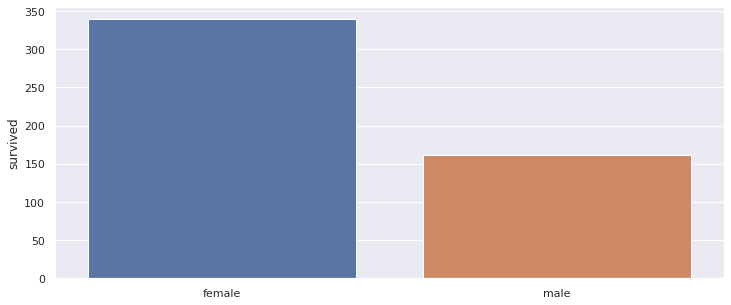

In [31]:
sns.barplot(x=df['sex'].unique(),y=sex_num)

#### 4-1-2 성별 생존률 비교( 생존자 수/탑승자 수)

> 성별 생존률
>- 남성: 0.19098457888493475 ( 161명/843명)
>- 여성: 0.7274678111587983 ( 339명/466명)

> 여성의 생존률이 남성의 약 4배 가까이 될 정도로 앞도적으로 높았다.

In [46]:
m_count = df['sex'][df['sex']=='male'].count()
f_count = df['sex'][df['sex']=='female'].count()
m_count, f_count

(843, 466)

In [44]:
sex_sur = [f_sur/f_count,m_sur/m_count]
sex_sur

[0.7274678111587983, 0.19098457888493475]

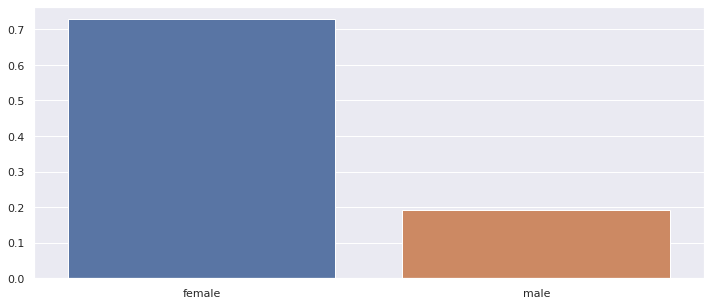

In [45]:
sns.barplot(x=df['sex'].unique(),y=sex_sur)

#### 4-1-3 성별과 다른 요인들간의 비교분석 (pclass, fare, age)


In [58]:
df['sex'].groupby(df['pclass']).count()
pd.pivot_table(data=df,index='pclass',columns='sex',aggfunc = 'mean')[['age','fare','survived']]

age                   fare             survived          
sex        female       male      female       male    female      male
pclass                                                                 
1       37.037594  41.029272  109.412385  69.888385  0.965278  0.340782
2       27.499223  30.815380   23.234827  19.904946  0.886792  0.146199
3       22.185329  25.962264   15.324250  12.415462  0.490741  0.152130